In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

In [2]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [3]:
presidential_account_apc = pd.read_csv('/Users/Desktop/Senti Project/2019/mbuhari1.csv')
presidential_account_pdp = pd.read_csv('/Users/Desktop/Senti Project/2019/atiku_acc.csv')
apc_keyword = pd.read_csv('/Users/Desktop/Senti Project/2019/apc1.csv')
pdp_keyword = pd.read_csv('/Users/Desktop/Senti Project/2019/pdp1.csv')
buhari_keyword = pd.read_csv('/Users/Desktop/Senti Project/2019/buhari1.csv')
atiku_keyword = pd.read_csv('/Users/Desktop/Senti Project/2019/atiku.csv')

In [4]:
atiku_keyword.head()

id                      created_at  \
0  1099096468009484288  Fri Feb 22 23:59:52 +0000 2019   
1  1099096415916224512  Fri Feb 22 23:59:40 +0000 2019   
2  1099096396022644737  Fri Feb 22 23:59:35 +0000 2019   
3  1099096350166315009  Fri Feb 22 23:59:24 +0000 2019   
4  1099096343509983232  Fri Feb 22 23:59:23 +0000 2019   

                                       original_text    screen_name  \
0  The time to vote @atiku is now @bukolasaraki @...   AtikuPolVang   
1  Gunmen Abduct Atiku's Spokesperson In Abuja ht...  Betagistnaija   
2    Collect the money and go vote for Atiku Simple.     nacha_gold   
3           President-Elect; Alhaji Atiku Abubakar 🙌   snr_sirlight   
4  Do you have any prove that @MBuhari has stolen...     i_am_socio   

             author_id  replies  retweet_count           to hashtags  \
0  1050250950001258497        0              1          NaN      NaN   
1           1725913201        0              0          NaN      NaN   
2            331241752        1              2  BolanleCole      NaN   
3           1239793644        0              0          NaN      NaN   
4            254919146        1              0    LucyAguwa      NaN   

                                       user_mentions  \
0  @atiku @bukolasaraki @Mo_Atiku @osita_chidoka ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                           @MBuhari   

                                                urls  
0                                                NaN  
1  http://www.betagistnaija.com/2019/02/gunmen-ab...  
2                                                NaN  
3                                                NaN  
4                                                NaN

In [5]:
atiku_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             20000 non-null  int64 
 1   created_at     20000 non-null  object
 2   original_text  19814 non-null  object
 3   screen_name    20000 non-null  object
 4   author_id      20000 non-null  int64 
 5   replies        20000 non-null  int64 
 6   retweet_count  20000 non-null  int64 
 7   to             13507 non-null  object
 8   hashtags       2622 non-null   object
 9   user_mentions  4152 non-null   object
 10  urls           2777 non-null   object
dtypes: int64(4), object(7)
memory usage: 1.7+ MB


In [6]:
pdp1 = pdp_keyword.append(atiku_keyword, ignore_index=True)

In [7]:
pdp1.head()

id                      created_at  \
0  1099096482328776705  Fri Feb 22 23:59:56 +0000 2019   
1  1099096336773902336  Fri Feb 22 23:59:21 +0000 2019   
2  1099096327500247041  Fri Feb 22 23:59:19 +0000 2019   
3  1099096221397016578  Fri Feb 22 23:58:54 +0000 2019   
4  1099096147032006657  Fri Feb 22 23:58:36 +0000 2019   

                                       original_text   screen_name  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...  watsupafrica   
1                         Lindo dms pdp nmrl men 😍😍👈    arrobatiti   
2  Nigerians, do not deter on 2mrw weather condit...  PortieCarthy   
3  #NigeriaDecide Finally, I’m calling on the goo...      DrealAdo   
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...     idikaedco   

             author_id  replies  retweet_count             to        hashtags  \
0           2616078570        0              0            NaN        #Nigeria   
1  1058180318195269633        1              0  enquarantaine             NaN   
2           3101440701        0              0            NaN             NaN   
3           1306694533        1              0            NaN  #NigeriaDecide   
4           3019639072        0              0            NaN             NaN   

            user_mentions                                               urls  
0                     NaN                              https://goo.gl/DgvmHq  
1                     NaN                                                NaN  
2  @OfficialPDPNig @atiku                                                NaN  
3         @atiku @MBuhari                                                NaN  
4                     NaN  https://www.facebook.com/100003518598815/posts...

In [8]:
pdp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             40000 non-null  int64 
 1   created_at     40000 non-null  object
 2   original_text  39786 non-null  object
 3   screen_name    40000 non-null  object
 4   author_id      40000 non-null  int64 
 5   replies        40000 non-null  int64 
 6   retweet_count  40000 non-null  int64 
 7   to             23056 non-null  object
 8   hashtags       5174 non-null   object
 9   user_mentions  6235 non-null   object
 10  urls           9400 non-null   object
dtypes: int64(4), object(7)
memory usage: 3.4+ MB


In [9]:
pdp = pdp1.append(presidential_account_pdp, ignore_index=True)

In [10]:
pdp.head()

id                      created_at  \
0  1099096482328776705  Fri Feb 22 23:59:56 +0000 2019   
1  1099096336773902336  Fri Feb 22 23:59:21 +0000 2019   
2  1099096327500247041  Fri Feb 22 23:59:19 +0000 2019   
3  1099096221397016578  Fri Feb 22 23:58:54 +0000 2019   
4  1099096147032006657  Fri Feb 22 23:58:36 +0000 2019   

                                       original_text   screen_name  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...  watsupafrica   
1                         Lindo dms pdp nmrl men 😍😍👈    arrobatiti   
2  Nigerians, do not deter on 2mrw weather condit...  PortieCarthy   
3  #NigeriaDecide Finally, I’m calling on the goo...      DrealAdo   
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...     idikaedco   

             author_id  replies  retweet_count             to        hashtags  \
0           2616078570        0              0            NaN        #Nigeria   
1  1058180318195269633        1              0  enquarantaine             NaN   
2           3101440701        0              0            NaN             NaN   
3           1306694533        1              0            NaN  #NigeriaDecide   
4           3019639072        0              0            NaN             NaN   

            user_mentions                                               urls  
0                     NaN                              https://goo.gl/DgvmHq  
1                     NaN                                                NaN  
2  @OfficialPDPNig @atiku                                                NaN  
3         @atiku @MBuhari                                                NaN  
4                     NaN  https://www.facebook.com/100003518598815/posts...

In [11]:
pdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             40345 non-null  int64 
 1   created_at     40345 non-null  object
 2   original_text  40131 non-null  object
 3   screen_name    40345 non-null  object
 4   author_id      40345 non-null  int64 
 5   replies        40345 non-null  int64 
 6   retweet_count  40345 non-null  int64 
 7   to             23070 non-null  object
 8   hashtags       5384 non-null   object
 9   user_mentions  6261 non-null   object
 10  urls           9437 non-null   object
dtypes: int64(4), object(7)
memory usage: 3.4+ MB


In [12]:
pdp['party'] = 'PDP' 

In [13]:
pdp.head()

id                      created_at  \
0  1099096482328776705  Fri Feb 22 23:59:56 +0000 2019   
1  1099096336773902336  Fri Feb 22 23:59:21 +0000 2019   
2  1099096327500247041  Fri Feb 22 23:59:19 +0000 2019   
3  1099096221397016578  Fri Feb 22 23:58:54 +0000 2019   
4  1099096147032006657  Fri Feb 22 23:58:36 +0000 2019   

                                       original_text   screen_name  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...  watsupafrica   
1                         Lindo dms pdp nmrl men 😍😍👈    arrobatiti   
2  Nigerians, do not deter on 2mrw weather condit...  PortieCarthy   
3  #NigeriaDecide Finally, I’m calling on the goo...      DrealAdo   
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...     idikaedco   

             author_id  replies  retweet_count             to        hashtags  \
0           2616078570        0              0            NaN        #Nigeria   
1  1058180318195269633        1              0  enquarantaine             NaN   
2           3101440701        0              0            NaN             NaN   
3           1306694533        1              0            NaN  #NigeriaDecide   
4           3019639072        0              0            NaN             NaN   

            user_mentions                                               urls  \
0                     NaN                              https://goo.gl/DgvmHq   
1                     NaN                                                NaN   
2  @OfficialPDPNig @atiku                                                NaN   
3         @atiku @MBuhari                                                NaN   
4                     NaN  https://www.facebook.com/100003518598815/posts...   

  party  
0   PDP  
1   PDP  
2   PDP  
3   PDP  
4   PDP

In [14]:
pdp.columns

Index(['id', 'created_at', 'original_text', 'screen_name', 'author_id',
       'replies', 'retweet_count', 'to', 'hashtags', 'user_mentions', 'urls',
       'party'],
      dtype='object')

In [15]:
pdp = pdp.drop(['id', 'created_at', 'screen_name', 'author_id', 'replies', 'retweet_count', 
           'to', 'hashtags', 'user_mentions', 'urls'], axis = 1) 
  

In [16]:
pdp.head()

original_text party
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...   PDP
1                         Lindo dms pdp nmrl men 😍😍👈   PDP
2  Nigerians, do not deter on 2mrw weather condit...   PDP
3  #NigeriaDecide Finally, I’m calling on the goo...   PDP
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...   PDP

In [17]:
pdp['original_text'] = pdp['original_text'].astype(str)

In [18]:
#Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
pdp['tidy_tweet'] = pdp['original_text'].apply(cleanTxt)

# Show the cleaned tweets
pdp.head()

original_text party  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...   PDP   
1                         Lindo dms pdp nmrl men 😍😍👈   PDP   
2  Nigerians, do not deter on 2mrw weather condit...   PDP   
3  #NigeriaDecide Finally, I’m calling on the goo...   PDP   
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...   PDP   

                                          tidy_tweet  
0  Nigeria: Caucus Meeting: APC, PDP Debate Alleg...  
1                         Lindo dms pdp nmrl men 😍😍👈  
2  Nigerians, do not deter on 2mrw weather condit...  
3  NigeriaDecide Finally, I’m calling on the good...  
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...

I want to add the tweets’ subjectivity and polarity to the DataFrame. In order to do this, I’ll create two functions: one to get the tweets called Subjectivity (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) and the other to get the tweets called Polarity (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score). Next I’ll store the results into two columns — one called Subjectivity and the other called Polarity — and show the results.

In [19]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
pdp['Subjectivity'] = pdp['tidy_tweet'].apply(getSubjectivity)
pdp['Polarity'] = pdp['tidy_tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
pdp.head()

original_text party  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...   PDP   
1                         Lindo dms pdp nmrl men 😍😍👈   PDP   
2  Nigerians, do not deter on 2mrw weather condit...   PDP   
3  #NigeriaDecide Finally, I’m calling on the goo...   PDP   
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...   PDP   

                                          tidy_tweet  Subjectivity  Polarity  
0  Nigeria: Caucus Meeting: APC, PDP Debate Alleg...      0.000000  0.000000  
1                         Lindo dms pdp nmrl men 😍😍👈      0.000000  0.000000  
2  Nigerians, do not deter on 2mrw weather condit...      0.500000 -0.488281  
3  NigeriaDecide Finally, I’m calling on the good...      0.766667  0.366667  
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...      0.400000 -0.100000

In [20]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


pdp['sentiment'] = pdp['Polarity'].apply(getAnalysis)
# Show the dataframe
pdp.head(10)

original_text party  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...   PDP   
1                         Lindo dms pdp nmrl men 😍😍👈   PDP   
2  Nigerians, do not deter on 2mrw weather condit...   PDP   
3  #NigeriaDecide Finally, I’m calling on the goo...   PDP   
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...   PDP   
5  APC has never won Taraba. It's been PDP since ...   PDP   
6                                         Pdp_ daivd   PDP   
7                                 にゃんにゃんガオー☆＼( 'ω')／   PDP   
8  KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK...   PDP   
9  It's only the deaf, blind and confused that wi...   PDP   

                                          tidy_tweet  Subjectivity  Polarity  \
0  Nigeria: Caucus Meeting: APC, PDP Debate Alleg...      0.000000  0.000000   
1                         Lindo dms pdp nmrl men 😍😍👈      0.000000  0.000000   
2  Nigerians, do not deter on 2mrw weather condit...      0.500000 -0.488281   
3  NigeriaDecide Finally, I’m calling on the good...      0.766667  0.366667   
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...      0.400000 -0.100000   
5  APC has never won Taraba. It's been PDP since ...      0.000000  0.000000   
6                                         Pdp_ daivd      0.000000  0.000000   
7                                 にゃんにゃんガオー☆＼( 'ω')／      0.000000  0.000000   
8  KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK...      0.000000  0.000000   
9  It's only the deaf, blind and confused that wi...      0.687500 -0.200000   

  sentiment  
0   Neutral  
1   Neutral  
2  Negative  
3  Positive  
4  Negative  
5   Neutral  
6   Neutral  
7   Neutral  
8   Neutral  
9  Negative

In [21]:
dict = {'Neutral' : 0, 'Positive' : 1, 'Negative' : -1}

In [22]:
# Remap the values of the dataframe 
pdp['sent']= pdp['sentiment'].map(dict) 

In [23]:
pdp.head()

original_text party  \
0  #Nigeria: Caucus Meeting: APC, PDP Debate Alle...   PDP   
1                         Lindo dms pdp nmrl men 😍😍👈   PDP   
2  Nigerians, do not deter on 2mrw weather condit...   PDP   
3  #NigeriaDecide Finally, I’m calling on the goo...   PDP   
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...   PDP   

                                          tidy_tweet  Subjectivity  Polarity  \
0  Nigeria: Caucus Meeting: APC, PDP Debate Alleg...      0.000000  0.000000   
1                         Lindo dms pdp nmrl men 😍😍👈      0.000000  0.000000   
2  Nigerians, do not deter on 2mrw weather condit...      0.500000 -0.488281   
3  NigeriaDecide Finally, I’m calling on the good...      0.766667  0.366667   
4  KILL THOSE TRYING TO KILL DEMOCRACY As expecte...      0.400000 -0.100000   

  sentiment  sent  
0   Neutral     0  
1   Neutral     0  
2  Negative    -1  
3  Positive     1  
4  Negative    -1

In [24]:
pdp.to_csv('pdp2019.csv', encoding='utf-8')

In [25]:
del dict

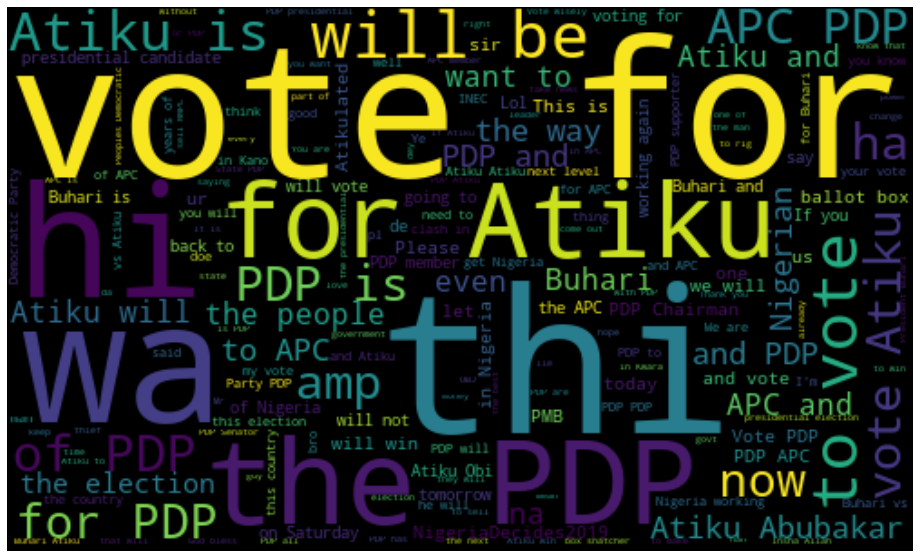

In [26]:
# word cloud visualization
allWords = ' '.join([twts for twts in pdp['tidy_tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize=(15, 10))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = pdp.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['tidy_tweet'][i])
    print()
    j= j+1

Printing positive tweets:

1) NigeriaDecide Finally, I’m calling on the good people of Nigeria to come out en-mass and Vote for Mr. Credible, AAA(Alh. Atiku Abubakar)  as President and not Mr. Lifeless, Muhammadu Buhari  under the platform of (PDP) today Saturday 23th February 2019

2) Am neither in support of APC nor PDP nor any other party... What am interesting on is simple. "A New Face as President" NigeriaDecides2019 NigeriaDecides

3) So you guys are talking about going back to PDP who created the problem in the first place? You want to go back to Egypt? Iyaa yin ko i to. Nigeria won't go back but those willing to sacrifice their children's future for "money no circulate" token will face its consequences o. 

4) First time PDP is going into an election without having the security agencies and the national treasury at there disposal.

5) pdp &amp; apc is not by force pls, be flexible. it’s okay for naij to be ruled under a completely different party, you will acc not die

6) O ti 


542) NigeriaDecides2019: 5 People Confirmed Dead In Kano APC, PDP Clash &gt;&gt;&gt; 

543) The impunity of PDP was legendary now they just meow like the cat next door. Downsized,all thanks to PMB and his force of integrity that has stared down Nigeria’s worst demons.

544) Don't be deceived oga, all this is just a social media ranting. Make sure you don't spend too much anyway coz you can't win

545) If politics is truly a game of numbers, then I don't see how the PDP and Atiku is winning tomorrow's election. NigeriaDecides2019 

546) Vote ortom out. Now ortom is in pdp that's very rubbish

547) when we talk about choices, you can call those we had in 2015 choices, non of them prooved to me well enough to give a try, most of them like the hungry ones did again this year, stepped down days to election for either pdp or apc , you , i totally disagree brother , not my choi

548) I love the thief than a murderer

549) My uncle is the ward chairman for APC while my younger brother is the 

1080) Cheap campaign! With no popularity! Galadima has never defected to PDP but RAPC which allies with PDP to produce and support Atiku.

1081) One of the greatest mistakes of the PDP is privatising Nitel, Nepa and Mtel. Apart from the revenue these companies remit to the treasury, they also have a workforce of over 6000 staff nationwide. After privatisation, more than 3/4 of these workers were out of job.

1082) Lol point of correction when Atiku we declare winner then all the money you collected on behalf of pmb will hurt you forever and to make it clear to you I don’t live in Nigeria and I have o business to do with Atiku money am living very fine not like you in Nigeria suffering

1083) Those calling for APC & Buhari and those calling for PDP &amp; Atiku should kindly ask themselves some questions! 1. Are you better today compare to 2014/2015? if yes please vote Buhari, if no vote Atiku 2. Is the... 

1084) If PDP have no hidden agenda, why are they against this? 

1085) The lazy 

1541) Many Injured As APC And PDP Supporters Clash In Kano 

1542) Poverty mentality will not drive economy and make Nigeria great. PMB will borrow Nigeria into poverty. Then, your lives will be more miserable. Atiku will teach you people how to make wealth. Vote PDP and Atiku and become wealthy or die miserably poor.

1543) PMB won't win Delta,PDP will also not garner 1m+votes.

1544) Osifo claimed to have 10 million supporters that are going with him to APC. This man is from Edo. How many registered voters in Edo that he has to take 10m to APC? So his defection is inconsequential. PDP will win Edo.

1545) 6 months after wining this election, PDP this is the kind of results I want to start seeing.   

1546) Kajuru Killings: PDP, police call for calm 

1547) Yes possible strong msg by PM along with strong mag to Kashmir stone pelter by /nc/PDP.

1548) Well during PDP they were thousands of Killing by headsmen were they persecuted? In benue since the arrest of the local govt chairman an

2207) Nigerian Youths are the leaders of today... if you don't know, know today? The battle isn't with PDP|APC both against our own generation... A vote for Butiku is a vote 4 independence generation that caused all our previous problems Make sure your 1-vote is 4 

2208) CybokNews Now: (PDP urges Nigerians to vote and reclaim our great nation...Says there will be no witch hunt) has been published on CybokNews - 

2209) When does ballot box snatchers become the saint, good question that only PDP thug can provide answers

2210) It's not PDP that looted our country for 16 years, it's you politicians. U just dress up in APC or PDP apparel to deceive the people. But tomorrow the battle is between the people and their politicians. The voice of the people is the voice of God. So keep calm and await ur fate

2211) Buhari wants to campaign by 9am this morning. Pdp take note

2212) PDP has my vote already and many millions...

2213) _ will be so glad and humble if I win one sir _ i want to give

2724) I Pledge to Nigeria My Country, To disgrace BUHARI and OSIBAJO with my PVC To be calm, loyal on election day To thumb print for PDP with all my Strength, To protect my PVC, And uphold no violence and trouble. So help me God...🙏 NigeriaDecides2019

2725) Prof Mahmud of  was almost masturbating as he spent over 30 minutes proudly explaining to journalist how he received Natasha in his office and at one stage almost buying the antics of the Russian born Kogi PDP,sorry SDP candidate 

2726) Don’t be influenced by PDP's huge money to buy votes, APC tells Nigerians – Daily Trust 

2727) PDP sun mutu 😂 Yaro ka dawo winning team

2728) No chance it is only between the APC and the PDP the rest did not even campaign how will they win

2729) PDP will win Ondo and there is nothing you can do about it😊 

2730) Serious Gun Battle between the Ruling Party (APC) and main Opposition Party (PDP) has led to two dead and many injured. 

2731) Isn't true, impossible, PDP to win the election

2732) Pr


3207) Ore those candidates campaigned against APC and PDP and called them names. Now they are supporting the same people they called names. Should I still trust them tomorrow? 13

3208) just view for 16yrs of PDP how many MW and for 3yrs+ APC how many? If i tell you how many power plant that has b commissioned under this govt you will still deny bcos Nig like liars and looters

3209) *BREAKING NEWS* *As part of PDP's plan to create more jobs, PDP is now recruiting ballot box snatchers who can run faster than bullets. Interested candidates should contact Dino,(Head of Thuggery Department). Salary is in US dollars and to be paid after the elections.*😀😀😀

3210) You guys keep blasting the PDP on every issue. But yet at the same time are available to welcome their decamped members. If that's not paradox, i wonder what is

3211) While Apc is wailing and planning on how to rigg themselves back into power. PDP is busy commissioning new projects in their various states of governance. Governor 

3760) President Obasanjo did so much 2 move the economy forward. Same with President Jonathan. I think PDP is good in economic development and thus should be supported. Let's be grateful for what President Obasanjo did for Nigeria.He was selfless in ensuring the country moves 4ward

3761) Ok sir. I will vote PDP on the Presidential ballot. AtikuOurPresident

3762) The PDP is an old timer in the game of unbridled corruption and heinous mismanagement of national wealth. It is a party of habitual nation-destroyers and accomplished looters of the public till. Read more at: 

3763) We cannot afford to keep behaving like a people condemned to keep repeating their mistakes, for any attempt on our part as a people to return PDP to power at this point in time will amount to self-condemnation of our own country for generations yet unborn 

3764) TEXT OF A PRESS RELEASE FOR THE ENDORSEMENT OF THE PRESIDENTIAL CANDIDATE OF THE PEOPLES DEMOCRATIC PARTY (PDP) by  Gentle men of the press, Stakeholder

4206) Some Pastors get it wrong. Most of them don't hear from anything God (just claim). The reality: Nigeria is in bad hands at present and only God can control PDP/APC to favour the people. God is able and if He chooses YPP or AAC we shall thank Him with greater expectation. 

4207) 1,000,000 or more votes for PDP in imo state on Saturday or nothing !  

4208) This projection is heavily flawed...55% voters turnout in Abia?katsina? Abia will be less and katsina more........PDP will win Rivers,Delta ,akwaibom but that 3m+ gap from 2015 can never happen again....margins will be strongly eroded. Even GEJ didnt get 400k votes in Bayelsa

4209) The Grooming/Awareness activities was conducted by MCC- Devi Ahilya Vishwavidyalaya, on 30th January 2019 for students of "Journalism/ Mass communication". The Communicative English Workshop was conducted in which many students participated and learned about Life skills, PDP 

4210) PDP introduced BVN,TSA, fertilizer policy, wanted 2 end oil subsidy

4731) Ride on progressive party. Btw darkness PDP and light APC

4732) I am not a PDP supporter, but let me tell you one thing. We're talking about Thugs (who uses stealing as a means of livelihood) against security operatives. When two lion fights the grounds suffer. Such spontaneous instruction from PMB didn't consider the mases

4733) Proudly an Akwa Ibomite Pdp 

4734) Are these people insane? BusesForDemocracy is for anyone who wishes to vote irrespective of the parties. Can’t you guys live without finding something to blame out of PDP? It is APC against Nigerians not PDP. Use your sense wisely even if the Oga’s own is malfunctioning 

4735) It is rather Nigerians that were supposed to unite and pick a worthy candidate but due to politicking and online savagery we lost our heads. PDP had the chance to front a transparent candidate that was loyal to the party but they chose this instead for "selfish reasons"

4736) I wonder why FFK didn't make campaign team of PDP presidential cand

5117) A man of God should NEVER openly endorse a candidate,if he must, he should first cast aside the calling of a clergy and be a politician. Teach the flock what to look for in a leader, let them make the choice. If he has a congregation, there will be APC, PDP, YPP, etc members.

5118) Fact PDP has no plan for Yoruba, fact PDP relegated Yoruba during gej and obj. Fact PDP denied Yoruba chairmanship, even Wike denigrate the whole Yoruba. Fact Yoruba is well represented in this government, fact Yoruba benefits with infrastructure develop. under this government.

5119) If PDP should win, Rarara should just gather his things and leave Nigeria😂 what this man has done! What do you think would happen to him?

5120) The new  is a congregation of self ambitious individuals whose agenda roots in personal interest.

5121) "Why had no one told me about Kierkegaard?" -PDP GOOD QUESTION

5122) Within three years of buhari rule in office he borrowed more than 16 years of PDP and you want Nigeria t

5594) How much were these things before PDP came into power? I'm sure you're too young to remember, but I'm waiting for your response.

5595) PDP already got ur limbic system bro 😆😆 whichever I strongly pray for the disgrace of both come Saturday

5596) THIS CAN ONLY HAPPEN UNDER PDP's GOVERNMENT Akwa Ibom got one of the best Stadium's in Africa Now they're the first state to have their own airline Tbh: Akwa Ibom is not on any state's level in Nigeria IbomAir

5597) Dose people supporting pdp wish they see our angle, pdp almost destroyed us.

5598)  is supporter of terrorists, stone pelters, sepratists leaders, Pakistan and . She had strongly supported the killed terrorist Burhanvahni and now demanding the body of hanged terrorist Afzal Guru. She misused her position as CM in BJP+PDP Govt. 

5599) This is why people are shouting, implementation will be one sided. Even if APC does it nothing will happen, but PDP God n others can even be framed up. Watch what will happen in PDP strong ho

6039) See the difference between COMPLETE and FINISHED, Example: ~When you cast your vote for APC,you are COMPLETE! When you cast your vote for ~PDP,you are FINISHED! ~And when you cast your vote for Atiku,You are COMPLETELY FINISHED! God Bless PMB

6040) Let's vote for someone that will transform this country into a modern Economy that works for people and make us among the Top 20 Economy of the world. Atiku is the man. Let's vote AtikuOurPresident ElectionNotWar GoOutAndVote VoteNotFight .

6041) I’m glad the election is coming up today, the noise will finally be over and we can eventually discuss other matters like food and relationship. Words like Economy, corruption, APC, PDP, Atiku, Buhari, Peter Obi, 2019 election, INEC etc will give room inside my ears

6042) We all know  is winning

6043) THUMBS UP FOR BUHARI A friend of mine told me that if i post this picture today and go against atiku/obi that so many people will curse. Oya let me see because I know he's very wrong. Thumbs 


6538) Lmao and I’m the Judas? If it’s my personal problem, why did you take ur precious time to respond though? 😃

6539) You think that the real voters tweet?

6540) Atiku wants to work with the youths, Someone that understand this generation and want it to be better,someone that can relate, and at his age still understand what fun is,100% ATIKULATED. AtikuOurPresident ElectionNotWar NigeriaDecides2019

6541) Ok INEC Chairman. Noted Just help get NTA working Thanks

6542) Anyway, vote for Atiku guys. He's the only way forward at the moment. Let's show Buhari some love and send him back to Daura so that he can focus on his health issues.

6543) If atiku win I will trek from kebbi to sokoto

6544) _AbPaul @_Skinny_AF this guy thinks Atiku will win Adamawa

6545) Atiku's own sounds more realistic

6546) We're just concluding that he'll sell it to his friends. Eyes will be on him I don't think he'll be that foolish to sell it to his friends. I see wealthy Nigerians from every tribe in the

6930)   hahahaha

6931) Very good Atiku is my choice

6932) When you see the leader, you can easily tell the kind of followers he/she will have. OBJ made us know that Atiku is a super thief, I am not surprised his follower wants to "steal" his dad's PVC. Words like steal, sell, enrich always exist in Atiku and his supporters camps.

6933) NigeriaDecides2019 Vote  Vote . Choose wisely, Choose 4G and VOTE . The Right Man For The Job. 

6934) You and I both know these our YOUNG candidates are just there to create awareness for 2023 Tho it seems HEAVEN SENT, our COUNTRY is not yet ready for a YOUNG PRESIDENT Let's just pray we all elect a better candidate this time

6935) So, we were when he was voted in in 2015, but we all know that landed Nigeria, world poverty capital, world infant mortality capital, fuel price hike, dollar exchange rate hike, inflation, loss of jobs, warned by CBN to reduce rate of borrowing, no foreign investment, insecurity.

6936) Atiku May Face Life in Prison After

7255) I will rather travel with untrustworthy but a good driver in order to be alive vote for Atiku Obi 

7256) Very good Please tell him to vote Atiku tomorrow

7257) Wisdom is profitable to direct; reduce ur prayer points by VOTING OUT president Muhammadu Buhari tomorrow. Be counted!!! My name is Uzor Johnpaul my PVC is for Atiku Abubakar tomorrow 

7258) You have done well brother, win or lose ,the country have seen your capacity

7259) If you have ever worked with children, you will know that when children say someone is wicked they are indirectly saying the person is disciplined and of high integrity. He will not allow just anything to go 

7260) Very funny,  clear road  is coming. Man wen sabi road Na him we go follow, renowned business man

7261) God willing. Nigeria will be Atiku-lated

7262) 7 the Good governance of PMB reached my village ooo. Next level activated. Atiku Gbawaa door. We don't need ur kind again.👿😈

7263) Atiku gats retain that Buhari camera man if he wins.

72

7870) We defeated Dollar  in  primary election 2015 and we will defeat him tomorrow Insha Allah NextLevel NigeriaDecides

7871) BBC Interview: Obasanjo Says Atiku Is Twice Better Than Buhari  via  before we go to the polls tomorrow _Bayo   

7872) Atiku wants to scam us biko, this one atikulooter is mentioning 2024 and 2030. Sowore all the way. TakeItBack sowore2019 sowore4president

7873) Me eh after 4hours of not following back I kokoma unfollow a day at most, why like when you know you won't follow back

7874) Na Akobo people dey enjoy Atiku pass... Owó wọlé anyhow ni

7875) Mr Galadima is playing safe. He’s seen signs already!! His boss  will soon claim to be an APC member too. NextLevel all the way

7876) I just dey laugh .. NextLevel sure die! 😁😁😁😁➕😀😀😀😀

7877) We are hundred and one ready to Atikulate Obidiently

7878) How many were the APC governors then?

7879) Do you know that, in not less than 48hours Atiku will start becoming Buhari's President.

7880) Who is your best candi

8430) Exactly

8431) Privatization Is No Remedy To The Myriads Of Dysfunctions In Our Institutions & Organizations. One Of The Many Baseless Conjectures Inherent In The Existing System. Surrendering Our Collective Patrimony Meant To Take Care Of Our Basic Needs To Private Whims Is An Aberratn Error

8432) If this is the best you can do, then it's little wonder an Atiku managed to convince you he's the way.

8433) Atiku is our best option and he'll deliver. NigeriaDecides2019 TheVerdict 2019Elections TheVerdict nigeria electionday 2019Elections Atikulated AtikuOurPresident VoteWisely VoteYourFuture

8434) nope it didnt give a prediction. But before it closed down its Nigerian unit it showed it wasnt pleased with the way  is piloting the affairs of the nation. However even tho Citi tipped buhari to win, it predicted a stock rally if  wins

8435) Lol CIA agent has spoken

8436) Quick one guys as we get ready for tomorrow's election ...your vote counts 😃😃  NigeriaDecides2019 Buhari feladur

8869) I have a very strong belief that we will use this new one under  

8870) It can only be to the best interest of Nigerians that you come out the winner. My prayers are with you sir and may God almighty be with you. Aluta continua, Victoria acerta!!!

8871) We know and we are wise to see that the propaganda has failed them

8872) We Buharists we know how to sacrifice, so because of her love to our dear President, i dedicate my PVC to her, Sai Baba PMB4Plus4 BuhariWillWin Insha Allah

8873) OK, he will still be shock if na jmt

8874) It is over for APC - Kwankwaso, Secondus boast as millions storm Kano stadium to welcome Atiku 

8875) It is over for APC - Kwankwaso, Secondus boast as millions storm Kano stadium to welcome Atiku 

8876) The way  rigged the general election in 2007

8877) From the comments on nairaland, many seem to be thinking Buhari is leaving Aso Rock tomorrow once Atiku wins. Even if Buhari loses, we still have to endure him till may

8878) Oil money Mismanaged. W

9379) Meet  three wife's he is a unifier. Yoruba : Mrs Titi  Igbo : Barr Jennifer  Hausa : Mrs Rukayyat  Christianity and islam exist peacefully in his home he is a Wazobia man. If he becomes the president he will unite Nigeria. 

9380) You honestly know Atiku isn’t the right candidate to rule Nigeria but the fact that you only need him to unseat this present government is the reason why you’ll vote him tomorrow..

9381) Don't worry you can still visit him in daura🤔, with the amount of love he has for Nigeria he will open his house like museum for his supporters... 😂😂😂😂

9382) This is not about PDP or APC. I want a new Government for my beloved country. If Atiku wins, I owe 10 random followers 5000 recharge cards. NigeriaDecides2019 Atikulated

9383) Exactly, but it will be quiet unfortunate for them because Nigerian's have wise up... What happened in Osun was an eye opener... Therefore such negligence won't reoccur

9384) Atiku is a thief, but you haven't returned the change for the a


9869) . Decent margin

9870) God let atiku win pls because depression is real.

9871) Stealing, looting, fraud and bribery shall not be our potion. We shall build an egalitarian society based on honesty, integrity and hard-work as that's how the interest of the greatest majority can be best served.

9872) so next time we won't give birth to criminals like atiku,bahari,babaginda,obasanjo et al.. i'm not here to argue with people who keep enjoying the beating from their oppressor deadbeat

9873) Rohan.... Read in between lines... I didn't in any way show my support for Buhari... God forbid. What am saying is dx.... Both Atiku and Buhari are playing on our intelligence.. These two have done more harm than good to the populace. 🤷🤷 NigeriaDecides2019

9874) AAC IS THE WINNER SOWORE WILL WIN VOTE AAC

9875) I'm for PMB but trust me, we can be very cunny. Atiku will still get over 30% here in the SW because we don't put our eggs in one basket.

9876) Just like ur incorruptible buhari lifting


10358) My point exactly.

10359) A for atiku is a vote for better life 

10360) To be honest Buhari will win sokoto due to Wammako's influence and Akwa ibon Atiku will win despite Sen Akpabio's influence. 

10361) Obasanjo did not only call Atiku a thief,he destroy the name permanently in a book &amp; any one with Atiku as a name,so what stopped Atiku from taken Obasanjo to the court to clear his name? With this your logic, a 6yr old will definitely know that you are not reasoning properly.

10362) So give me just one good reason why we shouldn't vote for Atiku. Begging alone doesn't cut it.

10363) Mysterious truth. Foolish Nigerians who want to vote for buhari and poverty. Have you heard. You don't know the bigot and poverty emblem, buhari more than Aisha. Change your mind and vote for atiku. 

10364)  will win.. God save your nation from failed government.. amen

10365) About the Presidential polls: Kabiru Maiguard (KM): I dey fear for Baba, because of Atiku Friend: Atiku no fit wi

10851) He did the same on Friday last week, only to postpone the election in the early hours of last week Saturday

10852) How wish and pray any member of your family members will be a victim of Fulani herdsmen and Boko Haram attack, then I will know if you will be happy and bold to support This present government. As I said, if Atiku wins and he doesn't perform. We will remove him.

10853)  Is peaceful. There is something PEACEFUL about  candidacy!!!!  

10854) My vote goes to the right candidate who can put things right and get Nigeria working again by the special grace of God Abubakar you are our next presidenletsgetnigeriaworkingagainGodblessnigeria.

10855) Please if you love Atiku, retweet this and follow me let's know ourselves! 

10856) I pledged 2 Nigeria mah country 2 Disgrace Atiku wit my PVC 2 B humble &amp; loyal on election day 2 Sweep away PDP wit my broom on 23rd of feb 2019 2 Vote 4 PMB 4 second tenure wit all… 

10857) Loool correct question is how many people voted f


11220) Atiku will win

11221) Vote  , the right man for this seat. 

11222) Right

11223) great video bro...please DM me

11224) ATIKU WILL WIN Tomorrow By God's Grace. Say Amen!!! 🙏🇳🇬💚

11225) Congratulations to win presidential election 23/2/2019 Alhaji Atiku Abubakar is a New President of Nigeria 2019. 

11226) Dear Niger Deltans,  want to muzzle the goose that lay the golden egg under the guise of restructuring. We must reject him and his Greek gift. We can not mortgage our future to satisfy Atiku insatiable quest for wealth. Let him take his job creation skill to his own region 

11227) Thanks ma'am

11228) My free Bus left Lagos this morning to Owerri Imo State and God is Guiding us so far!  all the way 

11229) Well during PDP they were thousands of Killing by headsmen were they persecuted? In benue since the arrest of the local govt chairman and one governors aides have u heard killing in benue again? No educate yourself uncle and u will be wise

11230) Vote  Abubakar Vote  Vo

11695) It’s good to vote for whoever you want o, no one is stopping you but if you’re voting for Atiku because you think Buhari will islamatize Nigeria then you’re not Nigerian. Nigerians are not stupid

11696)         60799908  Even little children knows and they love Atiku 🤣

11697) In tomorrow election, vote wisely, for me I will vote Atiku

11698) I am voting to make Nigeria work again! Everybody is entitled to his own opinion!

11699) We are highly ATIKULATED

11700) With all statistics and data issued out by ,  has a greater chance of winning.  winning is a miracle and I believe in miracles. Am highly Atikulated...

11701) Yes the girl is right, vote wisely vote Atiku Abubakar 

11702) WHY NOT ARREST ATIKU TOO BEFORE TOMMOROW

11703) 100% sure he will

11704)   _galadima    .. Information reaching us nw dat Fulani herds men are to attack PDP sensitive area in Kaduna south axis,jst 2 cause confusion in PDP youth nest. Pls do somethin,Kaduna south vote must count for PDP.

11705) V

12101) Wat of Leah Sharibu hv we forgotten her because of her faith, church pls raise up Atiku will do possible best to release her or he will tell us the truth live or sleeping

12102) We all know GEJ was voted out because of our the treasury was looted nd people have the mindset that same could happen in Atiku's time So i wouldn't want to blame those supporting PMB

12103) Lmao wrong set of people

12104) Atiku we have said it severally that most people behind you don't love you nor believe in you but many of them are not comfortable with Buhari.

12105) And er replace him with Atiku makes you patriotic? Oga fun gbogbo yin

12106) I see, how long ago was Atiku in the helm of political affairs? He left in 2007. The country was said to have grown to be the 3rd fastest growing economy in 2015 and yet you call him the root of our problems that only surfaced after the said "Good" man took over. Smh

12107) Who will win tomorrow’s Election. NigeraDecides NoToStaggeredElections atiku Buhari

12582) Then you are not born again. We barely have churches of christian Minority in LGAs in the North bcz of Killer Herdsmen attack or Bokoharam. We need a President that will end the war and unite us as Christians and Muslims.

12583) “ Atiku, will sell Niger Delta Region, after selling NNPC, just like Bakassi. People of ND should be wise“- Nnamdi Kanu

12584) The problem is not actually the privatization, it is the corruption that will be involved in the process. We all know what pdp is capable of doing, don’t ignore the calamity that can brew from what will be the biggest financial scam in our history. Atiku has an agenda, % bribes

12585) well... u guys should just relate it like dis... BUHARI AND ATIKU was jst like last season UCL Btw REAL MADRID &amp; LIVERPOOL FC Barça fans supported LIVERPOOL KNOWING  back of dia mind RMA will win.. So if u support ATIKU no prob.. Ur vote will count jst da t PMB WILL STILL WIN

12586) Just been watching Atiku media videos on my TL.....Feeling 

In [28]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = pdp.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['tidy_tweet'][i])
    print()
    j=j+1

Printing negative tweets:

1) Nigerians, do not deter on 2mrw weather condition. It will rain heavily in some areas. Donot stay at home. Go out wth ur umbrella to cast ur votes for  .  is the man. PDP!!! POWER!

2) KILL THOSE TRYING TO KILL DEMOCRACY As expected, PDP is panicked by PMB’s directive to security agencies, describing it as a threat to lives of Nigerians . It’s a lie, it’s a threat to those engaged in... 

3) It's only the deaf, blind and confused that will not see how backward buhari and apc are. Nigerians are out to reclaim their country and they are voting pdp. By Sunday morning this will be clear to u

4) Jonathan /PDP left those girls to boko Haram for so long! Not caring until PMB came and rescued them! Sai baba! NextLevelOfABetterNigeria

5) Is it possible to get the best out of bad and ugly? Just saying PDP and APC supporters think about it and change your mind set.

6) I am confused. 1. Isn't the NASS assembly election tomorrow? 2. What would have been the reaction

87) Peace Accord broken by APC, out members are being arrested over flimsy reasons – PDP cries… 

88) I did now They are both devils Both riggers Both looters But pdp is worst Not worse, worst

89) Fake news

90) This same Buhari was the only President since 1991 to be interested in the Ogoni land cleanup. Sir Buhari is not the problem of this nation. The PDP has invested so much in sponsoring lies and propaganda about this man. Sir, the PDP is behind the division of this country.

91) No detail here Cleverless. If I was doing your PDP or assessment you’d fail for lack of detail. I imagine you’ve left the detail due to lack of no real facts to substantiate the claims ?

92) 😁😁 I knew she would. They just can’t get over this “pdp did it first” mentality, thereby coming up with ridiculous claims. Ignorant bunch!!!

93) Delta Central will speak in one loud voice against the constant attempts by the PDP to take us back to the dark ages. AgegeAgain

94) Amu market in Mushin was asked to sta


282) APC FAILED US...VOTE ATIKU VOTE PDP

283) The evil that you did in the past is still chasing you. Continue to embarrass us with lies and fake news to the international community. (PDP) people deceiving people.

284) APC propaganda machine at work . The dollar is still at the same rate we all know. Vote Atiku, Vote Atiku, Vote Atiku, Vote Atiku, Vote Atiku.

285) Fake news PDP 😂

286) $16bn for electricity $20bn oil revenue looted by Diezani. $10bn for rail $10bn spent on 1R And $bns of Abacha loots spent by Dasuki with blessing of GEJ. Sacking of  for blowing whistle on Diezani. PDP would no longer exist in the West VoteBuhari SaiBaba

287) What's wrong with PDP?

288) God ll never forgive PDP for making life difficult for Nigerians

289) PDP hand work. Nigerian army should be very careful of PDP they are desperate.

290) Is the PDP not doing the same thing? Pot calling a kettle black. 

291) 🤣🤣🤣🤣🙆🏾‍♂ my people I beg . Na wetin PDP wan do with result sheets before voting day? Tif

408) Breaking News!! PDP drags President Buhari to court on eve of election, for daring to mandate to security forces to deal with Ballot box snatchers ruthlessly.

409) The difference between PDP and APC is just buhari and osibanjo.All other goons are the same thing.

410) Police Arrest PDP Senator, Rafiu Ibrahim Read:  Amid OPEC Cuts, Oil Price Hits $67.14 Read:  FG Says N701b power generation intervention fund Stands Read: 

411) Herdsmen attack Benue, many declared missing Read:  Kano APC/PDP Clash: Police reveals number of dead, injured persons Read:  Delta Govt uncovers 500 fake orphanages Read: 

412) PDP chieftain in kebbi, chief emeka okafor,was arrested over vote buying and was moved to Abuja for further investigation....we av seen how desperate APC is 

413) Tomorrow election won't be so easy ooh, all APC members should work hard to ensure victory. We must act extravagantly, because PDP member are planning so hard, please it must be hand to hand, let not give them... 

414) 

635) I pity Nigerians sha! Your dad is now leaving well today after years of neglection by PDP. Will u want those that would come&amp;stop it again? 

636) See Algeria that sold less oil than GEJ with an 82yrs old president saved $194b in their foreign reserve, the 3rd largest producer in Africa, God won't allow pdp again, wasteful, clueless govt.  Where will you get the infrastructure funds from today?

637) Can we just dump APC and PDP in a surprise shit tomorrow and vote Sowore! And to all those saying he doesn't know anything about politics bla bla bla... Remember how those you presume they know have been leading us and think again. Esheun

638) Kano PDP, APC clash: 2 killed, 20 vehicles burnt 

639) You have failed our nation..quietly quit .you are unfit to be president. A bias president who's priorities are chasing looters from PDP and not APC..does not deserve a second term.hope Nigerians vote a new leader in tomorrow .

640) Cable, why don’t you simply say that 2 APC supporters

966) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni 

967) PDP to Buratai: Buhari has no power to deploy soldiers for election ….Says don’t drag military into Politics ElectionNotWar 

968) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni 

969) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni 

970) I promise you and PDP, my vote and my Family members votes! I am making efforts also, convince my friends, some who had vowed to vote at any election again, because of Disappointment by previous Governments.

971) Buhari vs Atiku: What last-minute defection of PDP chieftains mean for APC – Buni 

972) I want to tell the whole world to join Nigeria in prayers for this election because all they want now is do or die election. Federal Government is every minute doing the irony of all its telling the world and this is very dangerous to our dear democracy. Let people vote count.

973) Buhari vs 

1299) Uproar as police arrest PDP senator 

1300) Nothing changes..... it was worse under the PDP.

1301) Lolz I heard of something in d north but I won't say it out, d day atiku won d PDP ticket was d day PDP loose these election.

1302) I'm from Delta Central. Omo Agege only won last time because PDP fielded a very weak candidate. Omo Agege is not even a factor. He carries zero weight.

1303) Open your eyes.These guys are just as bad,if not worse than the PDP.They're all hypocrites,Buhari included.Buhari cares for only his personal interests which has nothing to do with the betterment of the common man.

1304) I must commend u for endless effort towards ensuring that PDP clinch victorious at all level.

1305) latestNigeriaNews Police Arrest PDP Senator Over Killings Of 4 People 

1306) Knew it wasn't directly vote buying but APC leveraged on it, just like PDP did for You-win. Game is the game.

1307) Even your source says "Suspected PDP thugs" . It's normal that if any chaos erupts i

1496) This present government is enriching and empowering the poor and it’s beginning to show. So a vote for PDP is your choice to remain poor cos their plan is to enrich the rich!

1497) EFCC to go after almost opposition politicians & anyone who disagreed with him within his PDP family, I didn’t like it but I was never part of those who complained. You know why? So long as those who were arrested and/or charged actually STOLE, why would I care? Even though the..

1498) Buhari, you & APC & INEC withheld PVCs in the strongholds of PDP and disenfranchised millions people that would vote for Atiku Abubakar &amp; PDP. You didn’t show exemplary leadership. You’re power drunk. You’re a tyrant and a dictator. You habitually abused your powers, severally. 

1499) Isn't true, he is PDP member, no space in APC sorry Buba

1500) Fetch a tweet where I'm supporting or campaigning for Buhari. You lots can be impossible. If you criticize APC, they'll say you're PDP. If you criticize PDP, they'll say

1799) ❌❌❌❌❌❌❌ PRESS RELEASE Plot to arrest, frame up and detain PDP chieftains in Akwa Ibom State by Senator Godswill Akpabio and Nsima Ekere This is to alert Akwa Ibom people, security agencies and the... 

1800) It keeps happening cos corrupt arm robbery politicians are desperate to rig, thereby frustrating every effort of the govt to maintain stated date. Where did opposition party, PDP, get their thumb printed ballot papers 6hrs before election is conducted? That's how terrible it is. 

1801) B-R-E-A-K-I-N-G: Police Arrest Kwara PDP Senatorial Candidate 

1802) Not good in Delta State.....we all know why.....PDP.

1803) Is there any chance APC will stop blaming past and focus on d future if we giv dem anoda chance? I jst wish we have beta choice dan chosen from two devils. There's no difference btw APC and PDP, they are birds of a feather... but we must vote 1 NigeriaDecides2019 VoteWisely

1804) Don't give up . Keep making ur voice known even if it doesn't favour you this Saturday

1965) Last time I check it was the 16years of PDP that ruined our Agriculture, during the military we have few foreign rice when OBJ took over he open the boarder flooded everywhere with Foreign goods &amp; 🇹🇼 rice, creating more jobs to foreigners by importing almost everything

1966) You clearly do not understand nigeria politics. We have only two political parties. 1. Apc 2. PDP The rest are just accompaniment. Forget about what God can do or miracles. Let state the fact.

1967) I will vote for competency  and I will vote against incompetent president.... youth are eager to vote PDP on Saturday 

1968) Plot to arrest, frame up and detain PDP chieftains in Akwa Ibom State by Senator Godswill Akpabio and Nsima Ekere 

1969) (PDP) Atiku Abubakar, vulnerable during the election. According to him, it was reliably gathered that the ruling party is allegedly working in connivance with the Army authorities alongside thugs and selected militants, who will be dressed in army attire and mandat


2295) VP Osinbajo, Gov. Ambode and their followers will vote PDP. VP is not safe with 2 aircrashes within 7 months. Watch your back Sir. For Apc, you are a bait for Yoruba votes that is the reason you have never been part of any security meeting in 3&amp;1/2 yrs. Vote  

2296) SAD NEWS!! Yan APC a Kano sun kaiwa yan PDP hari har sun kashe mutane da dama. Allah ya saka mana

2297) Less than 40 hours to Presidential Election, chairman of the PDP in Yobe State dumbed the party, joined APC and visited President  this evening. NextLevel

2298) Nigerians are always victim of bad governance due to their in patients. We the core river boys from Niger Delta region remains solidly behind President Buhari and APC. PDP and its members are all theives.

2299) Dey only apologized on behalf of dey bad eggs dat were in their midst but r currently in APC.PDP na surebet o...

2300) This election would be between the people of Nigeria and a government that failed to fulfil its promises, vote PDP. 

2301

2421) PDP raises alarm over alleged plan to disrupt elections in Ondo coastal area  NewLookTribuneAt70 NigerianTribuneAt70

2422) Common, I expected a detailed reason for your quote but you coming up with this cliche, let me ask what has APC done to deserve another term, do you know human make up the party PDP and last I checked they are active members of your APC.

2423) Why did the PDP imported thugs from neighbouring Local Governments to Isoko and lodge them in hotels in ISOKO since last Friday. Their plans have failed, Nigerian Army is coming for them. Snatch Ballot Box and die.

2424) It's quite unfair to make such ascertions without proof and poison the minds of people. He's the coordinator in Sapele, the state coordinator is a PDP woman and the complains I heard against her, I can begin to divulge here.

2425) Withdrawing security is to curtail the political process in Kashmir & they want to make our lives vulnerable. We've seen a lot of instances where politicians have been kil

2628) Bros Vote betweeen atiku and buhari. Las las your candidate won't go anywhere. We low key run a 2-party system in nigeria. Any vote that is not going to either APC or PDP is a waste pls. Unless sowore dey drag for 3rd place

2629) U are very stupid ,mad,n foolish.b/c they are ruling party that is y u said they are corrupt.u mean any ruling party is corrupt like PDP 16years.note,PMB govt not d same,if u are serious go to EFCC simple.

2630) PDP FAKE NEWS

2631) ATIKU invites you to vote for him and other candidates of his party PDP... 

2632) YOU ARE NOT COMING INTO ANY GOVERNMENT BECAUSE YOU ARE ALREADY A FAILURE AND ALL THE ERA OF PDP BUT BUHARI TILL 2023

2633) Just imagine the number of people that lost their jobs because of the bad economic decisions of the OBJ/ATIKU administration. Now Atiku is threatening to sell NNPC, imagine the number of people that will lose their jobs. PDP never again! 

2634) 2019 Election: Don’t Drag Military Into Politics - PDP, , 

2635) I know I c

2735) Lets even assume our Nation actually failed 16 times in 16 years of PDP rule. The truth is that in just 3 &amp; half years of APC rule, our dear country has failed 350 times. The failure is infact incomparable. I respect ur opinion though cos you must do what you are to do.

2736) 🔥🔥🔥🔥🔥🔥🔥 "WHY NIGER DELTA MAY NOT VOTE FOR ATIKU AND DIVORCE THE PDP FOR NOW IS BECAUSE OF THE NNPC SALES PROPOSAL"- Asari Dokubo. "Sales of the NNPC would rob off the economic gains of the common man in no time... 

2737) "While defending the worst elections in the history of Nigeria, Prof Iwu said “the PDP won because they were the only ones that campaigned in all the 36 states of the federation”. So, now that only Buhari went round... 

2738) PDP Presidential Campaign Group may be broke as EFCC intercept millions of Dollars allegedly belonging to Atiku (See Details)  TrendingNews OperaNews Video

2739) PDP Raises Alarm Over Alleged Intimidation Of INEC REC In Oyo 

2740) There must be at least one. Le

2890) Nigeria decides: Abia PDP accuses APC over alleged plot to use security personnel to rig elections 

2891) PDP making false claims to draw political mileage: Kashmiri students’ org 

2892) Fellow Nigerians please narrow down 2019 Presidential election to two parties: AAC and YPP. IGNORE APC/PDP. See APC/PDP like dead matter. Raise the talk and tempo. Talk and vote only AAC AND YPP 

2893) Two Dead, as APC, PDP Clash in Kwara 

2894) On TVCTHISMORNING,  brought 2 guest today; - One if a member of APC. - The other is a closet Buharist. They’ll NEVER invite a PDP member 😂😂😂😂😂😂. The game is the game!!!

2895) Meanwhile let's try not to forget the Pdp members that decamped to apc that are still in this current dispensation., we should stop fooling ourselves they are all corrupt leaders!

2896) Dont worry soon you ll cry to run back to PDP and discovered the ark as been closed . Mumu!

2897) _eke1 It is you and your PDP Looters that are idiots. 

2898) Nigeria decides: Abia PDP accuses

3082) 4."From PDP poor screening exercise for Federal employment to APC employment of family members and members of the ethnic group without screening exercise."-Emir Sanusi 5. "From PDP national party of corruption to APC ethnic party of corruption."-Emir Sanusi

3083) Loool bruh! Why u dey pander to fake news na. That's the hallmark of the PDP It is fake news that makes people think Atiku is worth his salt against a Buhari.

3084) Osun election: Don’t drag my school into murky politics – Poly rector tells PDP  sagagist

3085) If PDP and Atiku sell off NNPC can South south &amp; other oil producing State still hope on 13% derivation?? shine your eyes guys,

3086) Nigeria decides: Abia PDP accuses APC over alleged plot to use security personnel to rig elections 

3087) *"Federal Government declares Friday public holiday, and direct payment of workers salaries."* PDP:- "This is unacceptable. It is aimed at vote buying and rigging by APC. We shall petition the EU, USA, UK, France and oth

3287) Photos: Sad day! as Two people killed, several injured during APC and PDP clash in Kwara State 

3288) Are you sure Nigerian were sick since PDP era? Do you want to compare the cost of living between the two eras? The problem is that a lot of nigerians thought buhari was the saviour. 😁😁

3289) PDP cautions Buratai against dragging military into politics  NewLookTribuneAt70 NigerianTribuneAt70

3290) PDP is evil! 

3291)  PDP is not shouting because they intend to snatch ballot box. With security operatives that are clearly partisan, security chiefs attending APC rallies, with what happened in Osun election, we are not sure that instruction is for box snatchers but the opposition 

3292) 77fm amlagoslive PDP is not shouting cos they intend 2 snatch ballot box With security operatives that are clearly partisan, security chiefs attending APC rallies, with what happened in Osun election we're not sure that instruction is for box snatchers but the opposition 

3293) Check out this art


3484) Ekiti State Governor, Kayode Fayemi gave INEC officials in Ekiti State a sum of $473,000 a few hours ago- PDP

3485) We had 9 other presidential candidates beside APC and PDP but you supported Buhari in 2015 now you’re saying this one ......Abeg rest jo

3486) It wil take some uninforme Nigns tym 2 cum out of this ethnic moles we found ourselves. Whn shld we begin to ask ourselves what we truly deserve as a nation. PDP 16yrs blabla who's pdp &amp; who's apc. U nid 2 travel to Abj &amp; other parts of Nig to acces roads in case u dont have one.

3487) NIP Candidate Eunice Atuejide Withdraws, Backs Atiku Despite ’16 Years Of Bad PDP Leadership’ 

3488) NIP Candidate Eunice Atuejide Withdraws, Backs Atiku Despite ’16 Years Of Bad PDP Leadership’ 

3489) The problem is PDP and their agents thinks alike, very dumb

3490) PDP warns Army chief, Buratai not to drag the military into politics 

3491) Is like PDP planning to snatch ballot boxes don’t understand why they crying fowl

3492)

3668) Election: PDP advises Buratai not to drag Military into politics: The Peoples…  sagagist

3669) 😂😂😂 this one weak me pdp😨😨 

3670) You're making noise all over the place how you were the rigging brain behind PDP's reign and I ask, did you come to power thru rigging? issh

3671) You did well sir! Great land mark achievement. PDP keeps achieving while APC keeps hating. DON'T HATE! EMULATE!!

3672) We voted APC to be better than PDP not like them. Since they decided to be like PDP and even worst we are determined to go back to PDP.

3673) Unfortunately so it seem, i wish PDP will pull a surprise, this time

3674) ‘Buhari has no right to deploy military around polling units’ – PDP replies Buratai 

3675) Just say don't vote for PDP na. Na APC I wan vote for? Awake form your deep slumber

3676) Pdp don't need to buy votes because 95% of Nigerian’s are ready to vote the useless APC administration out. we are tired of seeing monkey’s like oshiomole, liars like lai Mohammed.    

3677) A

3840) Why the opposition are not comfortable about buhari' s statement? Nawa for pdp oo

3841) Someone already said that they will blame PDP for the failure of NigeriaAir and this guy didn’t disappoint

3842)  it was unfair not to have Chidoka respond on behalf of PDP to issues raised by the Reverend who supports the APC.

3843) "Jonathan's government messed up the church and turned them to political parties with money. Let church leaders come out openly and tell Nigerians, they are PDP MEMBERS." -Pastor Kasali on TVC Very pathetic

3844) Take away outcome of the two political parties meeting: APC: the  chairman  and others forced out their concerns on postponement of election and iron out other pressing issues PDP: the  chairman  &amp; others ended up celebrating and dancing

3845) "This sinister and unlawful plot is sequel to PDP’s discovery of the Party’s plans to rig the postponed Presidential and National Assembly elections of Saturday 16th February, 2019" 

3846)  truly an agbero


4212) please you can ask them again...the past sales of national assets what's benefit to common pple

4213) 😂 sorry I’m with atiku 

4214) People are shouting Atiku now, dis was how Dey shouted Buhari in 2015. I warned u guys in 2015 and I am still warming u now, Atiku is not good for Nigeria.

4215) Sometimes _md amazes me. I mean this guy Likes trump, Atiku Probably boko haram. Make this guy no join isis oo

4216) If it's bad news, then people like  ,ben Bruce, and other pdp trending it like crazy 

4217) Dear Bros Atiku, When People Started Calling You Tomorrow To Tell You That You Try, Know That Thing i we Have Been Telling Has Happened Be That. Just Take Heart. biko. Na So People Take They Call Chelsea 5 Days Ago After They Hard An Encounter With Man United.

4218) You are tired, go and sleep.

4219) Only a poor man can say this

4220) The crazy thing is most people who RT'd for Atiku won't vote or can't even vote 

4221) I am somebody!!! I am going to loose election 🗳 today. Wh

4454)  *Security: Atiku Promise to fix &amp; reform d Security system so that Bad eggs can easily identified. *To Revamp Economy *To Restrucure Nigeria ( He want reduce d power frm d Centre and increase state power and productn "|

4455) I was shocked too on hearing that, thank God, you cleared the air on that.

4456) Is a shame that you are going to follow the road that the PDP government have failed to built for sixteen years to vote for Atiku Allah kyauta.

4457) You are only preparing ground yo reject result and cause chaos. You will fail God Grace

4458) What if we decide to put in any other person asides Atiku and Buhari..? I mean are we not tired yet..? Can’t we do this shit once and for all 🤷🏽‍♂️ Let’s just shock two of them !!

4459) It's all just a game for the elite and we the high, average and low class people are being played.

4460) I feel so sorry for people who ask me if Atiku knows me or will remember me if he wins the election based on the mad support and campaign am 

4627) Rivers State is currently under heavy siege by Uniform men arresting and beating up PDP party faithfuls and threatening them will fierce brutality if they come out tomorrow      @10DowningStreet  

4628) Well if he really said this then he's entitled to his opinion. Not sure it's going to change the voting pattern in SS anyway. Same guy threatened fire and brimstone if GEJ lost but did nada when it happened

4629) Let them do their worst .Atiku it is

4630) It's either Atiku or Buhari. Don't be fooled by Buharists masquerading as 3rd force crusaders! They are hypocrists! Send the tyrant with his outdated ideas and methods home!

4631) I received this epiphany now, if Nigerian youths come out tomorrow and vote for Omoyele Sowore massively, there will be an upset in tomorrow’s election. But if not, Buhari is coming in for the second term. It shall be very difficult for Atiku to defeat Buhari in the election.

4632) If you don't want Buhari to remain the president of Nigeria and you

4836) The statement by one of his staunchest allies, Governor El Rufai of Kaduna State who warned against foreign interference when he unequivocally stated that those who attempt interference would be ferried back to their countries in body bags made matters worse. ElectionNotWar

4837) On the foreign scene, it seems the international community has abandoned President Buhari. ElectionNotWar NigeriaDecides2019

4838) Na so, same story, half of APC Were PDP before

4839) Fierce heavily armed looking men on uniform have been deployed to block Lokoja Abuja road. This is aimed at stopping opposition candidates from gaining access into the state.    

4840) The postponement of the polls, the statements from President Buhari and his largely uninspiring campaign has been to the advantage of Alhaji Atiku who has continued to gain momentum since late 2018. NigeriaDecides2019 ElectionNotWar

4841) BUHARI want to useless ATIKU dollars. His plans must fail AtikuWillWin NigeriaDecides2019 AtikuOurPr

5019) If you aren't voting  tomorrow please indicate 🙋‍♂️🙋‍♂️ Don't be afraid.... I just want to ask thunder to fire you 😒😒😒

5020) I dont know y...if I scroll and I see buhari i get so angry.

5021) All Nigerian Youths, Women and the Old have said, enough of Buhari APC wicked leadership. ATIKU and PDP is the only means to rescue Nigeria from the present Buhari evil leadership. Together, lets vote PDP (ATIKU and Other PDP Candidates), To Get Nigeria Working Again and Better! 

5022) Voting PMB is my sacred duty tomorrow and rejecting fantastically corrupt ATIKU is my obligation

5023) I now understand why they said not all people with big head have brain inside. It's unfortunate that when ur barber was scraping ur hair, he scrape ur brain join.

5024) Dead  vs : Criminal Atiku Will Be Selected By The Corrupt  As JubrilBuhari Will Return To His Home Country Sudan. 1 Boycott2019NigeriaElections FreeBiafra

5025) _Traffic PDP:“armed operatives of the EFCC stormed Fayose’s residence a few 

5221) I am angry with you. Why you don't want mention my presidential candidate 

5222) Atiku will not win Kogi state 

5223) How Atiku picked up momentum in the past one month is something

5224) AtikuOurPresident How can you postpone a presidential election on the day of the election. It is not fair womenforatiku arise for justice. Vote atikuobi let us make a difference . Its time for change to  . Let us atikulate 

5225) GOD IS desperate too to remove Buhari.

5226) Are you afraid of efcc? What concerns the youth With efcc abi they follow Share the loots?

5227) In line with Igbo Masses and ohaneze leadership resolve to vote massively to support atiku/obi,Kingsley moghalu has done the needful in stepping down waziri Adamawa.

5228) Unfortunately some hear but find a way to justify their choice of Atiku. This is one of the reason Atiku won't get my vote and other reasons 

5229) Well for what it's worth. I chose Atiku because I want Buhari out not because I 'entirely' buy into Buhari

5379) Does Buhari even know what a data base is Mtcheeew 🙄 continue wasting you data

5380) We tried Buhari and he failed woefully and disappointed us, let's try Atiku too.

5381) Good morning Nigerians. Pls don't vote Buhari. We can't keep re- enforcing failure. Let's try someone else like Atiku. If after 4years we are not comfortable with his government, then he will be voted out. 8year tenure must be base on merit. Thanks. From Temi

5382) I'm a pro democratic and anti fascism. I do not know how to tolerates or reward failure. For that reason I'm casting my vote for Atiku. You can cast yours for Buhari. Don't just sit at home with your PVC. It's your civil rights to vote for your choice candidate.

5383) I have sir..... what I saw are mere promises like a mother promising a child, I will buy you biscuits when coming back from market. There is no How in any of the page of Atiku’s Plan. Snap the page/pages &amp; reply me with it.

5384) Nooo, not take it or leave it what do you mean g

5594) How will they see anything wrong with that... When hate has created moles in their heart.

5595) Atiku is bad and Buhari is worse. But we just have to pick the better poison. GoOutAndVote 2019Election

5596) 24hrs to election, police arrest Kwara Senator over violence      

5597) The Atiku (stealing) trait in you wants to raise its ugly head. Reject it bro.

5598) I pledge to Nigeria my country, To disgrace Atiku and obi with my PVC, To be gentle,loyal,on election day, To vote for BUHARI with all my strength, To avoid snatching of ballot box, And uphold no violence and trouble, So help me god. AMIN 

5599) This Woman Is Really Angry With President Buhari  via      ElectionNotWar FreeSenRafiu 

5600) The dead don't song eulogy. Silly Yoruba beggars.

5601) Are you confused? See no make boys gather you o. Leave  for us. Thank you

5602) God bless you. OBJ A man who will do anything in d world to bring down anyone who goes against him. close your eyes for a sec and remember him tea

5777) Well sorry, but you will not get an atiku. Not on our watch and thank God our watchers are larger than yours. Next term, reject all infrastructure.

5778) Bro Atiku did you mean to say 'to get corruption working again'?

5779) For sale in Abuja, just landed from America. America used. You can start the car using the car remote. Is that not awesome. Contact me if interested 08132921473  _Nigeria   

5780) A person is corrupt if he uses his privileged position to enrich himself, his family or friends". Atiku in his media chat with Kadaria Ahmed

5781) This one will just one day wake up, come to his social networks then tweet stupidly and some people would digest his nonsense tweets. Lai se omode!

5782) Nigerians are solidly behind Atiku tomorrow.

5783)  _akin1  What Nigerians should understand is that Atiku supporters have no ideological focus , they have nothing in Atikus Character fabric they admire. They are strange bed fellows United by a common drink ."

5784) Voting for Ati

5943) President Buhari Reveals What he will do if he loses to Atiku on Saturday 

5944) President Buhari Reveals What he will do if he loses to Atiku on Saturday 

5945) Where is your common sense? INEC said."We won’t just move ad-hoc staff arbitrarily to places where we believe they are very vulnerable or places we believe that if we deploy them to, they are likely to come to harm.Nobody should expect INEC to conduct elections in those areas.

5946) I hope you've apologized to Dr Joe Abah, for wrongly accusing him? That will show, your advocating for character, is not just with mouth!😉

5947) The distribution of ballot papers and other sensitive materials to wards has commenced in my local govt. Only APC,PDP and ZLP agents are present. If we tell you these third force guys are not ready una no go listen. A vote for them is a vote for buhari Vote Atiku, vote mimiko

5948) Atiku can not spend what Jonathan spent in 2015.lagos PDP don't have any sensible leader.Bode George just came back

6118) If Atiku commits a lifetime damage nko? Gej swallowed your reserves, you sacked him, has oil gone back to $115 to accumulate new reserves? Are you not still suffering the consequences? Its stupid to tempt the devil. We have tried Atiku enough for 8yrs.

6119) Lol both your daddy bubu and Atiku are incompetent and corrupt! Can’t support them in anyway!

6120) Have been in my village for the past one week just to vote for Atiku at this presidential poll.....

6121) Chicken way run from London enter 9ja go still end up in my cooking pot of rice So what am talking is that tomorrow been 23/02/2019. Is the day of all Nigeria will come out in group with peace with there PVC and vote for the real person we stand for. No sell your vote. ATiku

6122) If  na thief, Obj for don handle am like Bode George.  for don rubbish am like Onnoghen. The  &amp;  for grab am for US Atiku is NOT a thief but a victim of systematic propaganda. BuhariIsGone

6123) I am sorry I can’t bec I am old enough to k


6255) Don't get it twisted, it doesn't have to be either Buhari or Atiku. There are other candidates with intellect and great pedigree. Check out Moghalu YPP. That your vote will be wasted is a large-scale mental fraud.  VoteWisely NigeriaDecides2019

6256) The bishop's killed in Benue were by local militia, the anambra attack was by drug lords. Where did herdsmen attack church? Were they going to graze inside the church?

6257) Please go out tomorrow and cast your vote.Don't be afraid to exercise your right.Your vote counts.    5809894

6258) In the next few days  will be called President-elect DefendyourVote

6259) It is a big lie, we didn’t say any negative thing about Atiku - US declares 

6260) Is  not a wicked bloodthirsty man? No wonder the  National Chairman,  said to him, “why do you like blood so much?

6261) You and who?? Abeg if you wan die there, die alone

6262) If we says that President  has turned  to his tool for manipulation of Saturday's election to favor him Buhari

6426) Y’all are mad, why didn’t you prosecute him? Allow him to sell us to Canada biko.

6427) It has been long that traitors have been among us.

6428) Ndi Igbo we must come out in mass to shun mediocrity and selfish galvanization orchestrated by some elements within. We need to support progress and the call to get Nigeria working Again. I stand with Atiku... 

6429) Daily I think about Buhari and Atiku and how both of the government of both of them would affect me and those around me. It's very unfortunate PDP fielded Atiku when there's the likes of Donald Duke, and... 

6430) Google Fayose's antecedent before making this statement. Fayose deserves every repulsive words he can ever get. He's done worse to Buhari and every leaders he's ever encountered.

6431) Idiot

6432) That means every government we've ever had has been terribly incompetence That solves it

6433) U urself will not get second chance talk less of ur Oga. Kaduna is for Atiku

6434) Disgusting to say the least.

6435)

6560) Fulanis' crisis has been with us even before Nig was created, how you think it started with Buhari beats me. You need to do your homework and find out the number of lives lost to fulanis crisis under Atiku and what he did about it. You must be a victim of fake news.

6561) Nigerian "lazy youths'" votes are all for Atiku. They know who is capable of delivering this Country from extinction and oppression

6562) Obasanjo with all his faults ran the country on far less than $78/barrel.So that's not an excuse.

6563) Under Buhari's watch her lunchbox reduced & the little princess knows if Atiku comes on board her lunchbox will increase again. SmartPrincess

6564) See am in it.and that wht am facing wen I moved to my house.i even pay 5k monthly they will still come harass me that 5k is small frm estimated bill that they can’t prove and disconnect me.

6565) So you couldnt even start with ur 8 years achievements. Well, this ur campaign has given a token back to the people. At least mone

6764) IfBuhariHad performed up to one-millionth of the desired expectations, we wouldn't have been considering Atiku in the first place. The only reason a vast majority of the Nigerian common man are considering Atiku is simple - Buhari has been a colossal failure.

6765) You are so lily hearted, after all your bravado. You couldn't leverage on any of the young candidates to move Nigeria forward. It's pdp. Well-done

6766) Haa...these guy's just want to come and finally finish this country. See Our foreign reserve that baba has saved alot. There eyes are already on it. God will not allow these bunch of thieves.

6767) If we don’t VoteBuhariOut as a nation, we all have failed this girl. See the sincerity of her mind and the hopes she wishes for on her face. Buhari is wicked. Who knows if she has been denied of ice cream due bad economy. BuhariMustGo

6768) Hahahahaha Fake Fake Kayode, Nigeria will Vote for the Man that's ready to stop Kleptocracy, the Man the push BH to a hide, a Man th

7088) Nigeria Decide 2019 For an incumbent govt to be struggling so hard in returning back to power is a proof of incompetence and underperformance. Now he can address Nigerians thrice in one month because of election. Nigerians will address you back tomorrow...

7089) Our decision is to retire you, and the cabals that act in your stead, to your NextLevelRETIREMENT, and hire Atiku Abubakar/Peter Obi to GetNigeriaWorkingAgain. February23 is only a few hours away, I will vote PDP. Chima Christian

7090) The game is up Ebube , you know it ,I know it . Atiku is unelectable, not in this present Nigeria .

7091) In spite of last weeks’ disappointment, I urge all Nigerians to come out and vote for the candidate of their choice, keeping in mind our desire to build a democratic and economically viable nation that will be respected amongst the league of democratic nations. PDPNECMeeting

7092) Alas, my concerns do not end there. Only yesterday General  said “the military and police should be rut

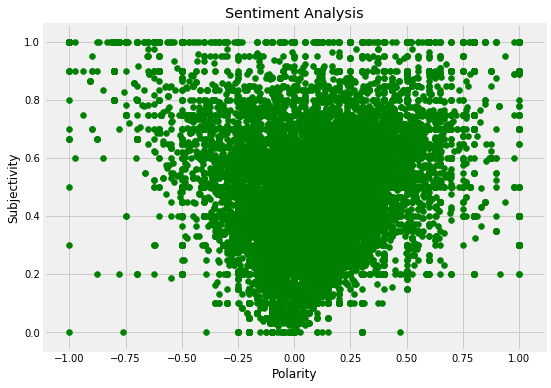

In [29]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, pdp.shape[0]):
  plt.scatter(pdp["Polarity"][i], pdp["Subjectivity"][i], color='Green') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [30]:
# Print the percentage of positive tweets
ptweets = pdp[pdp.sentiment == 'Positive']
ptweets = ptweets['tidy_tweet']
ptweets

round( (ptweets.shape[0] / pdp.shape[0]) * 100 , 1)

32.0

In [31]:
# Print the percentage of negative tweets
ntweets = pdp[pdp.sentiment == 'Negative']
ntweets = ntweets['tidy_tweet']
ntweets

round( (ntweets.shape[0] / pdp.shape[0]) * 100, 1)

17.7

In [32]:
# Print the percentage of negative tweets
ntweets = pdp[pdp.sentiment == 'Neutral']
ntweets = ntweets['tidy_tweet']
ntweets

round( (ntweets.shape[0] / pdp.shape[0]) * 100, 1)

50.4

In [33]:
# Show the value counts
pdp['sentiment'].value_counts()

Neutral     20314
Positive    12894
Negative     7137
Name: sentiment, dtype: int64

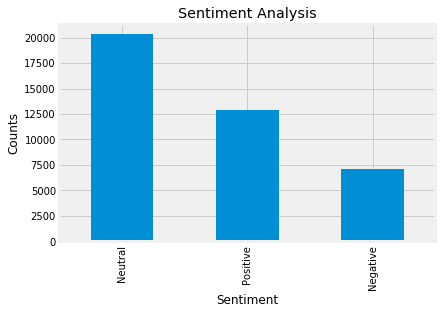

In [34]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
pdp['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

### Word Frequencies

In [35]:
import nltk
from nltk.tokenize import word_tokenize
tweets = pdp.tidy_tweet.str.cat(sep=' ')

In [36]:
#function to split text into word
tokens = word_tokenize(tweets)
vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

51766


['.',
 ',',
 'the',
 'to',
 'PDP',
 'of',
 'and',
 'is',
 'Atiku',
 'for',
 'in',
 'you',
 'a',
 'I',
 '!',
 'will',
 '?',
 'that',
 'APC',
 'are',
 '...',
 'not',
 'vote',
 "'s",
 'Buhari',
 'be',
 '’',
 'it',
 'this',
 'on',
 'Nigeria',
 "n't",
 ':',
 'have',
 'we',
 'with',
 'he',
 'your',
 'all',
 'do',
 'they',
 'The',
 'has',
 'as',
 'my',
 'was',
 'can',
 'by',
 'but',
 'from']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(1,1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(pdp['tidy_tweet'], 500)
#for word, freq in common_words:
    #print(word, freq)

In [38]:
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.head(10)

word  count
0    the  24514
1    pdp  21344
2     to  20722
3    and  14539
4     of  14223
5     is  13348
6  atiku  13197
7     in  11482
8    for  11191
9    you  10720

In [39]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(pdp['tidy_tweet'], 300)
#for word, freq in common_words:
    #print(word, freq)

In [40]:
df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df2.head(10)

word  count
0     of the   2189
1   vote for   2035
2     in the   1547
3    the pdp   1287
4  for atiku   1263
5    will be   1184
6    to vote   1148
7     to the   1069
8   atiku is   1063
9     is the   1022

In [41]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(pdp['tidy_tweet'], 200)
#for word, freq in common_words:
    #print(word, freq)

In [42]:
df3 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df3.head(10)

word  count
0         vote for atiku    529
1            all the way    470
2            to vote for    417
3            apc and pdp    415
4  nigeria working again    342
5    get nigeria working    317
6        buhari vs atiku    312
7   democratic party pdp    267
8           vote for pdp    249
9             of the pdp    243

In [43]:
tokenized_tweet = pdp['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Nigeria:, Caucus, Meeting:, APC,, PDP, Debate...
1                    [Lindo, dms, pdp, nmrl, men, 😍😍👈]
2    [Nigerians,, do, not, deter, on, 2mrw, weather...
3    [NigeriaDecide, Finally,, I’m, calling, on, th...
4    [KILL, THOSE, TRYING, TO, KILL, DEMOCRACY, As,...
Name: tidy_tweet, dtype: object

In [44]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [nigeria:, caucu, meeting:, apc,, pdp, debat, ...
1                     [lindo, dm, pdp, nmrl, men, 😍😍👈]
2    [nigerians,, do, not, deter, on, 2mrw, weather...
3    [nigeriadecid, finally,, i’m, call, on, the, g...
4    [kill, those, tri, TO, kill, democraci, As, ex...
Name: tidy_tweet, dtype: object

In [45]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

pdp['tidy_tweet'] = tokenized_tweet

In [46]:
pdp['tidy_tweet'] = pdp['tidy_tweet'].astype(str)

In [47]:
party_id_df = pdp[['sentiment','party']].drop_duplicates().sort_values('sentiment')
category_to_id = dict(party_id_df.values)
id_to_category = dict(party_id_df[['party', 'sentiment']].values)
# Pick 5 random samples from the dataframe
pdp.sample(5, random_state=0)

original_text party  \
6352   PDP'S CITY OF THE BLIND (3). Why is Osibajo a ...   PDP   
6946   Is the PDP candidate not a LAGOSIAN....??? ple...   PDP   
19120  Ku kasance da Rahma TV da misalin karfe goma. ...   PDP   
154    Delta PDP Raises Alarm Over Assassination Atte...   PDP   
3383   @rotimiAkeredolu’s govt inherited 7months sala...   PDP   

                                              tidy_tweet  Subjectivity  \
6352   pdp' citi OF the blind (3). whi is osibajo a V...      0.666667   
6946   Is the pdp candid not a lagosian....??? pleas ...      0.000000   
19120  Ku kasanc da rahma TV da misalin karf goma. sh...      0.000000   
154    delta pdp rais alarm over assassin attempt On ...      0.125000   
3383   ’s govt inherit 7month salari arrear from the ...      1.000000   

       Polarity sentiment  sent  
6352       -0.5  Negative    -1  
6946        0.0   Neutral     0  
19120       0.0   Neutral     0  
154         0.0   Neutral     0  
3383        0.0   Neutral     0

In [48]:
# Group the dataframe by categories and count items 
pdp.groupby('sentiment').party.count()

sentiment
Negative     7137
Neutral     20314
Positive    12894
Name: party, dtype: int64

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
labels = pdp.sentiment

In [51]:
labels.head()

0     Neutral
1     Neutral
2    Negative
3    Positive
4    Negative
Name: sentiment, dtype: object

In [52]:
text = pdp['tidy_tweet']

In [53]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=8, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [54]:
features = tfidf.fit_transform(text).toarray()

In [55]:
features.shape

(40345, 10571)

In [56]:
# Remember the dictionary created to map party to a number ? 
category_to_id.items()

dict_items([('Negative', 'PDP'), ('Neutral', 'PDP'), ('Positive', 'PDP')])

In [57]:
# The sorted function Converts dictionary items into a (sorted) list. 
# In subsequent steps - We will use this list to iterate over the categories
sorted(category_to_id.items())

[('Negative', 'PDP'), ('Neutral', 'PDP'), ('Positive', 'PDP')]

In [58]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 2  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for sentiment, party in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == sentiment)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(sentiment))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat
  

# 'Negative':
  . Most correlated unigrams:
       . fail
       . fake
  . Most correlated bigrams:
       . fake news
       . polic arrest
# 'Neutral':
  . Most correlated unigrams:
       . nan
       . win
  . Most correlated bigrams:
       . pdp win
       . atiku win
# 'Positive':
  . Most correlated unigrams:
       . better
       . win
  . Most correlated bigrams:
       . pdp win
       . atiku win


In [59]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [61]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [62]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [63]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

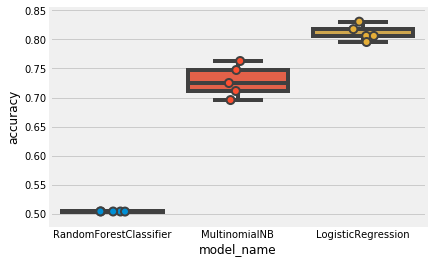

In [64]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [65]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.811303
MultinomialNB             0.728442
RandomForestClassifier    0.503557
Name: accuracy, dtype: float64

In [66]:
cv_df

model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.503656
1   RandomForestClassifier         1  0.503656
2   RandomForestClassifier         2  0.503532
3   RandomForestClassifier         3  0.503532
4   RandomForestClassifier         4  0.503408
5            MultinomialNB         0  0.747428
6            MultinomialNB         1  0.724997
7            MultinomialNB         2  0.762920
8            MultinomialNB         3  0.711241
9            MultinomialNB         4  0.695625
10      LogisticRegression         0  0.806172
11      LogisticRegression         1  0.795638
12      LogisticRegression         2  0.830710
13      LogisticRegression         3  0.817821
14      LogisticRegression         4  0.806172

In [67]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, pdp.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 18.5, 'Predicted')

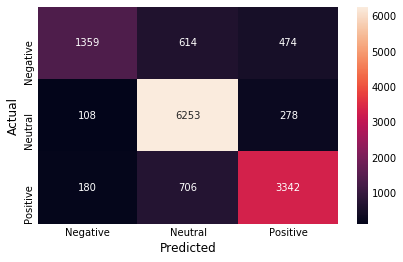

In [68]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=party_id_df.sentiment.values, yticklabels=party_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [69]:
model.fit(features, labels)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)